# Exercise 6.6 - Gerardo Pérez

# 1. Libraries and data import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
from datetime import datetime
import warnings

warnings.filterwarnings("ignore") 

plt.style.use('fivethirtyeight')

In [3]:
path = r'C:\Users\geram\OneDrive\Escritorio\Data Analysis\Coral Bleaching'

In [5]:
coral_bleach = pd.read_csv(r'C:\Users\geram\OneDrive\Escritorio\Data Analysis\Coral Bleaching\Coral Bleaching Project updated - Gerardo Pérez.csv', delimiter=';', index_col=False)

In [7]:
coral_bleach.head()

,Sample_ID,Cyclone_Frequency,Depth_m,Ocean_Name,Country_Name,Distance_to_Shore,Exposure,Turbidity,Date_Year,Bleaching_Level,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,10327299,"51,07","50,30",Pacific,Papua New Guinea,"706,63",Sometimes,"0,04",1998,Colony,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10327298,"50,90","50,00",Pacific,Papua New Guinea,"3276,02",Sheltered,"0,04",1998,Colony,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10327115,"61,03","42,70",Atlantic,Netherlands Antilles,"1422,68",Sometimes,"0,03",2005,Colony,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10327430,"39,16","42,00",Indian,Sri Lanka,"976,53",Exposed,"0,07",1998,Colony,...,NaN,Descriptive Statistics,Cyclone_Frequency,Depth_m,Distance_to_Shore,Turbidity,Date_Year,Temperature_Maximum,Percent_Bleaching,Temperature_Mean
4,10327784,"69,08","40,00",Atlantic,United States,"296,21",Exposed,"0,04",2005,Colony,...,NaN,Mean,"52,56634441","7,057877964","3011,037978","0,074959839",NaN,NaN,NaN,NaN


In [9]:
Columns_Info = coral_bleach.columns.tolist()

In [11]:
print(Columns_Info)

['Sample_ID', 'Cyclone_Frequency', 'Depth_m', 'Ocean_Name', 'Country_Name', 'Distance_to_Shore', 'Exposure', 'Turbidity', 'Date_Year', 'Bleaching_Level', 'Temperature_Maximum', 'Percent_Bleaching', 'Temperature_Mean', 'Realm_Name', 'Percent_Cover', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25']


In [13]:
coral_bleach.drop(columns=['Percent_Cover','Unnamed: 15','Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'], inplace=True)

In [17]:
coral_bleach_2010_2019 = coral_bleach[coral_bleach['Date_Year'].between(2010, 2019)]

In [19]:
coral_bleach_2010_2019.head()

,Sample_ID,Cyclone_Frequency,Depth_m,Ocean_Name,Country_Name,Distance_to_Shore,Exposure,Turbidity,Date_Year,Bleaching_Level,Temperature_Maximum,Percent_Bleaching,Temperature_Mean,Realm_Name
64,10276303,"33,22","29,90",Atlantic,United States,"3312,00",Exposed,"0,07",2012,Colony,"304,72",0%,"299,70",Tropical Atlantic
79,10276831,"88,08","27,00",Atlantic,United States,"2118,00",Exposed,"0,05",2012,Colony,"304,61",430%,"299,70",Tropical Atlantic
80,10276377,"33,22","26,00",Atlantic,United States,"3472,00",Exposed,"0,05",2015,Colony,"304,67",351%,"299,70",Tropical Atlantic
81,10276290,"41,60","25,90",Atlantic,United States,"3316,00",Exposed,"0,06",2012,Colony,"304,72",833%,"299,70",Tropical Atlantic
82,10276832,"57,84","25,60",Atlantic,United States,"2207,00",Exposed,"0,05",2011,Colony,"304,57",1111%,"299,69",Tropical Atlantic


In [21]:
print(coral_bleach_2010_2019.dtypes)

Sample_ID               int64
Cyclone_Frequency      object
Depth_m                object
Ocean_Name             object
Country_Name           object
Distance_to_Shore      object
Exposure               object
Turbidity              object
Date_Year               int64
Bleaching_Level        object
Temperature_Maximum    object
Percent_Bleaching      object
Temperature_Mean       object
Realm_Name             object
dtype: object


In [23]:
# Removing commas and percentage signs, converting data types:

coral_bleach_2010_2019['Cyclone_Frequency'] = pd.to_numeric(coral_bleach_2010_2019['Cyclone_Frequency'].astype(str).str.replace(',', '.', regex=False), errors='coerce')
coral_bleach_2010_2019['Percent_Bleaching'] = pd.to_numeric(coral_bleach_2010_2019['Percent_Bleaching'].astype(str).str.replace('%', '', regex=False), errors='coerce')
coral_bleach_2010_2019['Depth_m'] = pd.to_numeric(coral_bleach_2010_2019['Depth_m'].astype(str).str.replace(',', '.', regex=False), errors='coerce')
coral_bleach_2010_2019['Distance_to_Shore'] = pd.to_numeric(coral_bleach_2010_2019['Distance_to_Shore'].astype(str).str.replace(',', '.', regex=False), errors='coerce')
coral_bleach_2010_2019['Turbidity'] = pd.to_numeric(coral_bleach_2010_2019['Turbidity'].astype(str).str.replace(',', '.', regex=False), errors='coerce')
coral_bleach_2010_2019['Temperature_Maximum'] = pd.to_numeric(coral_bleach_2010_2019['Temperature_Maximum'].astype(str).str.replace(',', '.', regex=False), errors='coerce')
coral_bleach_2010_2019['Temperature_Mean'] = pd.to_numeric(coral_bleach_2010_2019['Temperature_Mean'].astype(str).str.replace(',', '.', regex=False), errors='coerce')
coral_bleach_2010_2019['Date_Year'] = pd.to_numeric(coral_bleach_2010_2019['Date_Year'].astype(str).str.replace(',', '.', regex=False), errors='coerce')

In [25]:
coral_bleach_2010_2019.shape

(14604, 14)

In [27]:
coral_bleach_2010_2019.isnull().sum()

Sample_ID              0
Cyclone_Frequency      0
Depth_m                0
Ocean_Name             0
Country_Name           0
Distance_to_Shore      0
Exposure               0
Turbidity              0
Date_Year              0
Bleaching_Level        0
Temperature_Maximum    0
Percent_Bleaching      0
Temperature_Mean       0
Realm_Name             0
dtype: int64

In [29]:
dups = coral_bleach_2010_2019.duplicated()

In [31]:
dups.shape

(14604,)

In [ ]:
# Data cleaned and prepared
# As stated in the direction, the project data set already contains time-series data

# 3. Data Subset creation 

In [51]:
coral_bleach_sub = coral_bleach_2010_2019[['Date_Year', 'Percent_Bleaching']]

In [53]:
coral_bleach_sub = coral_bleach_sub.groupby('Date_Year')['Percent_Bleaching'].mean()

In [55]:
coral_bleach_sub.head()

Date_Year
2010    655.025178
2011    428.047198
2012    168.488571
2013    373.619644
2014    776.332860
Name: Percent_Bleaching, dtype: float64

In [ ]:
# The dataset already has matching values for the time variable (Date_Year)
# I have grouped the data by the average values of "Percent_Bleaching", as this is the most important variable determining coral bleaching

In [57]:
coral_bleach_sub = coral_bleach_sub.reset_index()
coral_bleach_sub

,Date_Year,Percent_Bleaching
0,2010,655.025178
1,2011,428.047198
2,2012,168.488571
3,2013,373.619644
4,2014,776.332860
5,2015,725.645700
6,2016,1501.805324
7,2017,269.850727
8,2018,89.557522
9,2019,367.778620


# 4. Line Chart

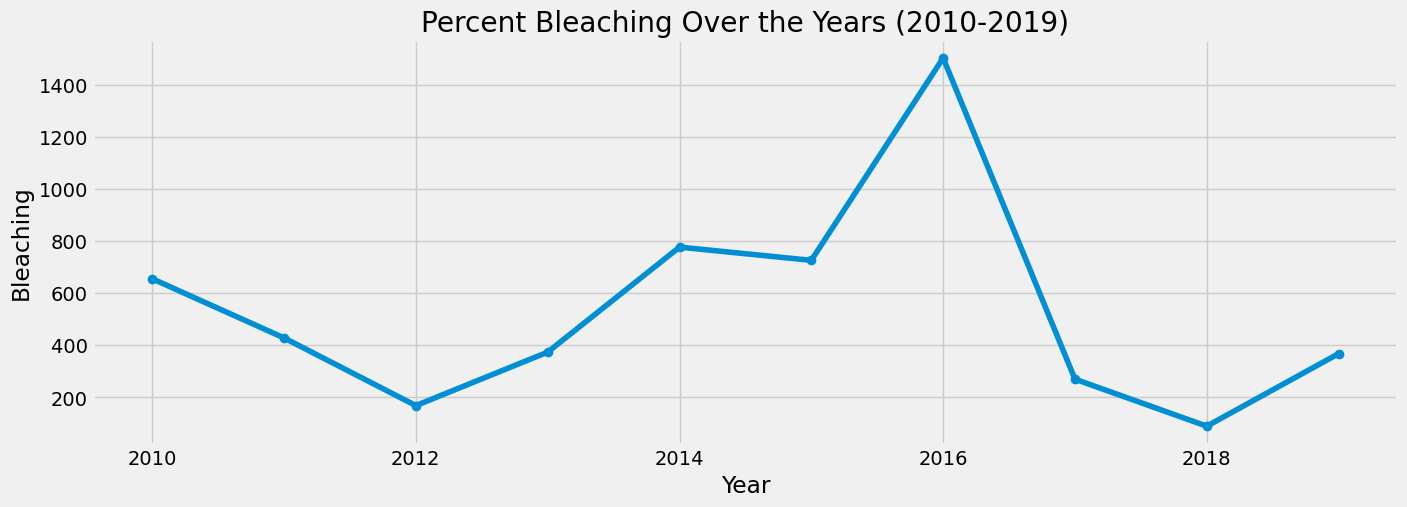

In [61]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(coral_bleach_sub['Date_Year'], coral_bleach_sub['Percent_Bleaching'], marker='o')
plt.xlabel('Year')
plt.ylabel('Bleaching')
plt.title('Percent Bleaching Over the Years (2010-2019)')
plt.grid(True)
plt.show()

In [ ]:
# There does not seem to be a seasonal component in the data, the bleaching stats dont follow a clear pattern
# Coral bleaching recorded a peak during 2016, followed directly by a strong decrease in the following year
# Further variables can be checked during the 2016 year, in order to see if further possible interactions are affecting coral bleaching more severely

# 5. Decompose the data's components

In [ ]:
# The data does not behave in a linear trend, thus, I will use the Multiplicative model

In [65]:
coral_bleach_sub['Date_Year'] = pd.to_datetime(coral_bleach_sub['Date_Year'], format='%Y')
coral_bleach_sub.set_index('Date_Year', inplace=True)

In [67]:
decomposition = sm.tsa.seasonal_decompose(coral_bleach_sub['Percent_Bleaching'], model='multiplicative', period=1)

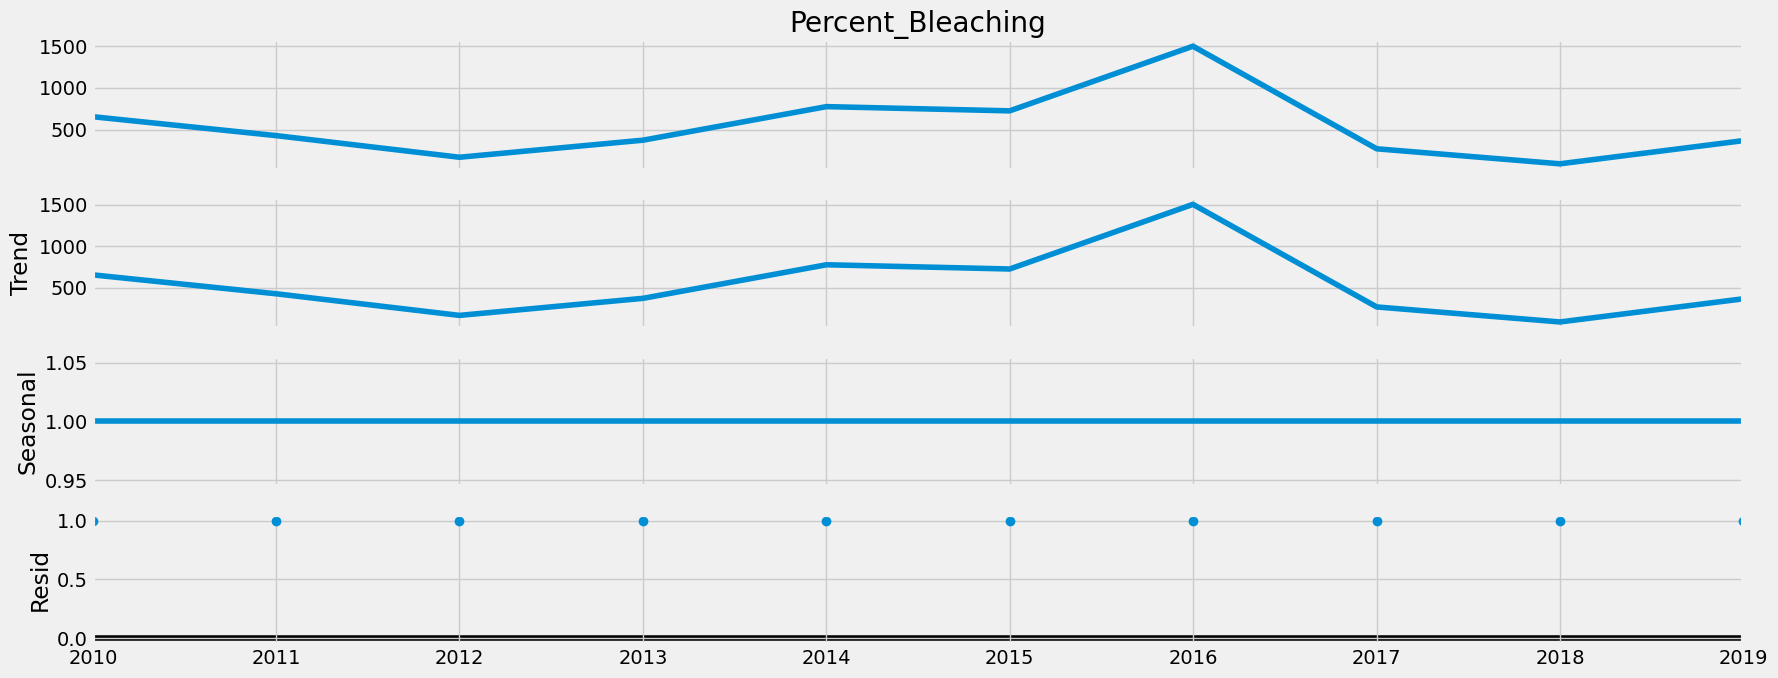

In [69]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7
decomposition.plot()
plt.show()

In [ ]:
# There is a visible decline in the trend from 2010 to 2012, followed by a rise peaking around 2016, and then a decline again toward 2019. This suggests fluctuations in the overall levels of coral bleaching, potentially due to external factors such as climate events
# The seasonal plot is flat because annual data doesn't exhibit a seasonal pattern for this dataset

# 6. Dickey-Fueller test - Stationary

In [73]:
from statsmodels.tsa.stattools import adfuller

def dickey_fuller(timeseries): 
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)


dickey_fuller(coral_bleach_sub['Percent_Bleaching'])

Dickey-Fuller Stationarity test:
Test Statistic                -5.598550
p-value                        0.000001
Number of Lags Used            3.000000
Number of Observations Used    6.000000
Critical Value (1%)           -5.354256
Critical Value (5%)           -3.646238
Critical Value (10%)          -2.901198
dtype: float64


In [ ]:
# Results discussion

In [ ]:
# Hypotheses around Date_Year and Percent_Bleaching:
# Null Hypothesis: Coral bleaching percent does not exhibit a statistically significant trend over the years 2010–2019
# Alternative Hypothesis: Coral bleaching percent shows a statistically significant trend over the years 2010–2019

# The null hypothesis can be rejected, as the test statistic is smaller than the 1%, 5% and 10% critical values
# The p-value is far below 0.05, indicating statistical significance
# The data set and series can both be categorized as stationary

# 9. Data autocorrelations

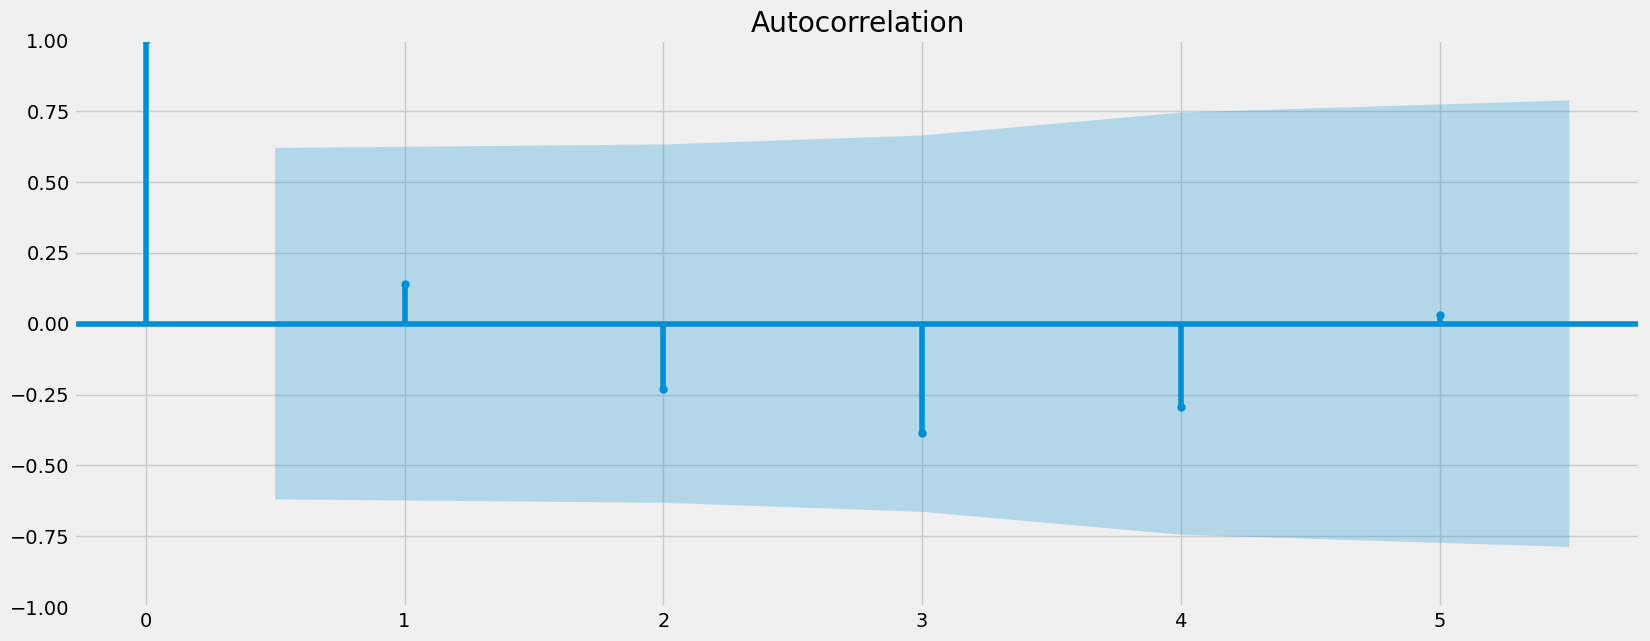

In [75]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(coral_bleach_sub)
plt.show()

In [ ]:
# The first spike looks significantly positive, indicating a possible strong relationship between the current year's coral bleaching and the previous years value
# After lag 1, the correlation drops, implying no significant correlations
# The time series does not seem to be perfectly stationary
# The data does not exhibit long-term trends or seasonality beyonf lag 1